# Интернет-магазин "Стримчик"

# Описание проекта

Предположим, мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нам нужно выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 
Нужно отработать принцип работы с данными. 
Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
# Подключаем библиотеку pandas
import pandas as pd

# Подключаем библиотеку matplotlib.pyplot для корректировки визуализации
import matplotlib.pyplot as plt
import numpy as np
# Для проверки гипотезы
from scipy import stats as st

## Получение датасета и предобработка данных

### Получение датасета 

In [2]:
# Открываем файл с данными и изучаем общую информацию
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Необходимые следующие действия для корректировки данных:

- Все названия столбцов изменить на нижний регистр
- Год выпуска изменить значение на целочисленного типа, т.к. преобразовать в datetime64 можно, но он будет выводить как "год - месяц - день", что для визуального вида неудобно
- Оценки критиков лучше изменить на целочисленного типа, поскольку оценивается по стобальной шкале. Если они оценивали по 10-бальной шкале, то лучше всего оставить вещественными числами для точной оценки
- Оценки пользователя изменим на вещественного типа. Аббревиатура 'TBD' расшифровывается как 'To Be Determined', т.е. 'Будет определено'. Следовательно, если в строке таких будут, то они по умолчанию не определены, аналогично как NaN, NA.  

### Предобработка данных

In [5]:
# Изменим все названия столбцов на нижний регистр
data = data.rename(str.lower, axis='columns')

In [6]:
# Изменим тип данных год выпуска на Int32
data['year_of_release'] = data['year_of_release'].astype('Int32')

In [7]:
# Изменим тип данных оценки критиков на Int32
data['critic_score'] = data['critic_score'].astype('Int32')

Обработаем пропущенные значения

In [8]:
# Смотрим кол-во пропущенных значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# Смотрим долю пропущенных значений
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Заметим, что здесь огромная доля пропущенных значений являются колонки: "critic_score", "user_score" и "rating"

Следующие действия для обработки пропущенных данных:
- Названий игр не можем заполнить пропущенные значения, т.к. этот столбец является уникальной значенией (категоризацией). Кол-во строк очень маленькое - 2, можем удалить их
- Установить год релиза можно, если покопаться с названием игры и узнать их год релиза. Но таких строк много, составляет 269 единиц. Оставим их как и есть
- Оценку критиков и пользователей можно заполнить ~медианной значений~ "заглушку" в числовом типе как "-1". Пропущенные значения этих столбцов свидительствуют о многих причинах: 
    - игра буквально только что вышла, оценивать не успели
    - локальная игра, т.е. разработали игру исключительно для себя/друзей, не для публик
    - игра, которая не заслуживает рейтинга
- Заполнить пропущенные значения рейтинга можно, если опять же все таки покопаться в интернете, узнать рейтинг названия игры и установить её. Оставим их как и есть

In [10]:
# Удалим список игр, в которых названия отсутствуют
data = data.dropna(subset=['name'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(2), float64(4), object(5)
memory usage: 1.4+ MB


In [12]:
# Оценку критиков заполним "заглушку" как -1
data['critic_score'] = data['critic_score'].fillna(-1)

In [13]:
# Находим уникальные значения оценки пользователя, чтобы корректировать значения, 
# потому что не получается преобразовать в вещественное число, если есть хотя бы один символ в строке
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [14]:
# Изменим 'tbd' на None
data['user_score'] = data['user_score'].replace('tbd', None)

# И изменим тип данных на вещественное число
data['user_score'] = data['user_score'].astype(float)

In [15]:
# Оценку пользователей заполним "заглушку" как -1
data['user_score'] = data['user_score'].fillna(-1)

In [16]:
# Рейтинг от организации ESRB заполним "заглушку" как "Unknown"
data['rating'] = data['rating'].fillna('Unknown')

In [17]:
# Смотрим кол-во пропущенных значений
data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [18]:
# Посчитаем суммарные продажи по региону: NA, EU, JP
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
# После подготовки данных смотрим на таблицу и убедимся в правильных решениях
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown,31.38


In [20]:
# Проверим на явные дубликаты
data.duplicated().sum()

0

Отсутствуют явные дубликаты, теперь можно продвигать дальше

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sum_sales        16713 non-null  float64
dtypes: Int32(2), float64(6), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Количество игр, выпущенных в определенном промежутке года

In [22]:
# Находим кол-во игр, выпущенных в определенном промежутке года
count_game_year = data.pivot_table(index = ['year_of_release', 'platform'], values = 'name', aggfunc = 'count')
count_game_year = count_game_year.rename(columns = {'name': 'count_game'})
count_game_year.head()

count_game
year_of_release platform            
1980            2600               9
1981            2600              46
1982            2600              36
1983            2600              11
                NES                6

In [23]:
count_game_year.tail()

count_game
year_of_release platform            
2016            PSV               85
                Wii                1
                WiiU              14
                X360              13
                XOne              87

Здесь можно заметить, что кол-во выпущенных игр растет, но не линейно. Рассмотрим на общей графике

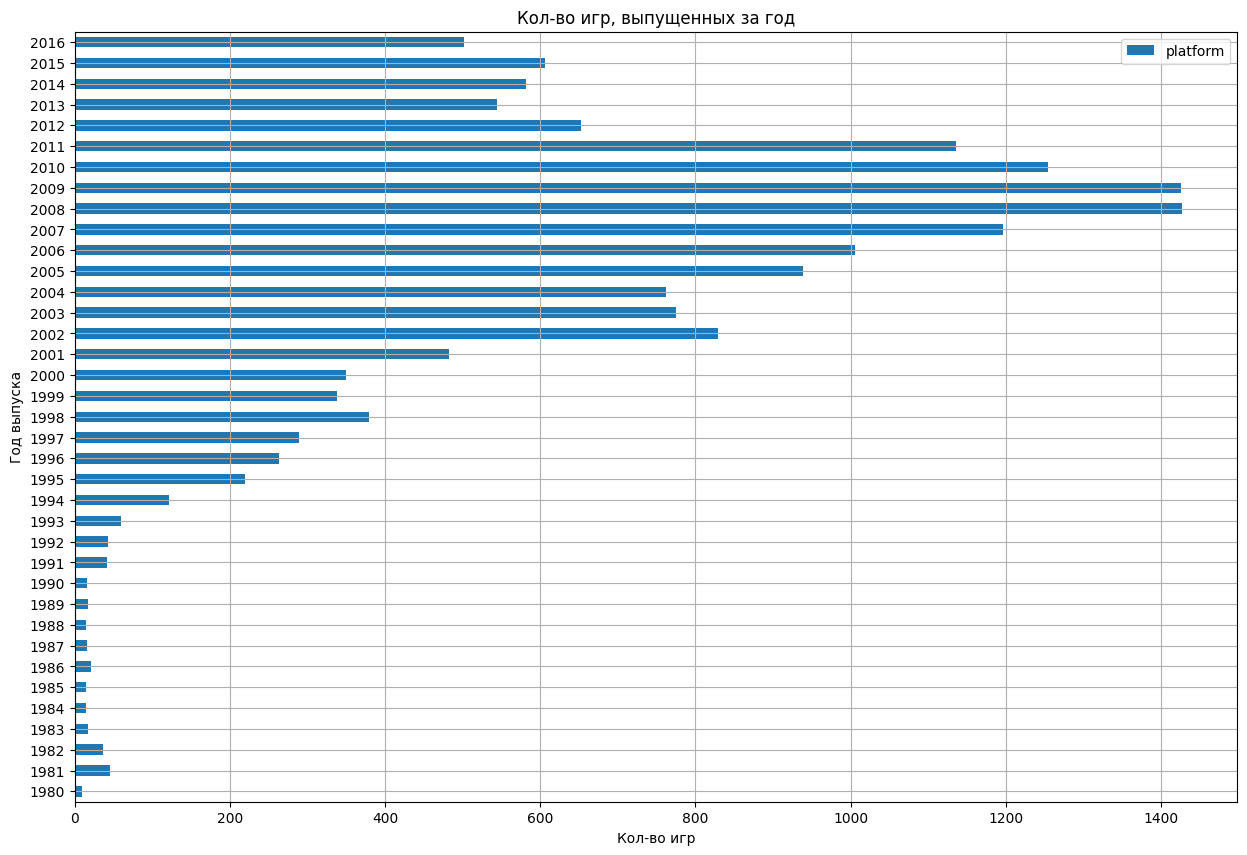

In [24]:
data.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count') \
.plot(
    kind = 'barh',
    title = 'Кол-во игр, выпущенных за год',
    grid = True,
    figsize = (15, 10)
);

plt.ylabel('Год выпуска');
plt.xlabel('Кол-во игр');
plt.show();

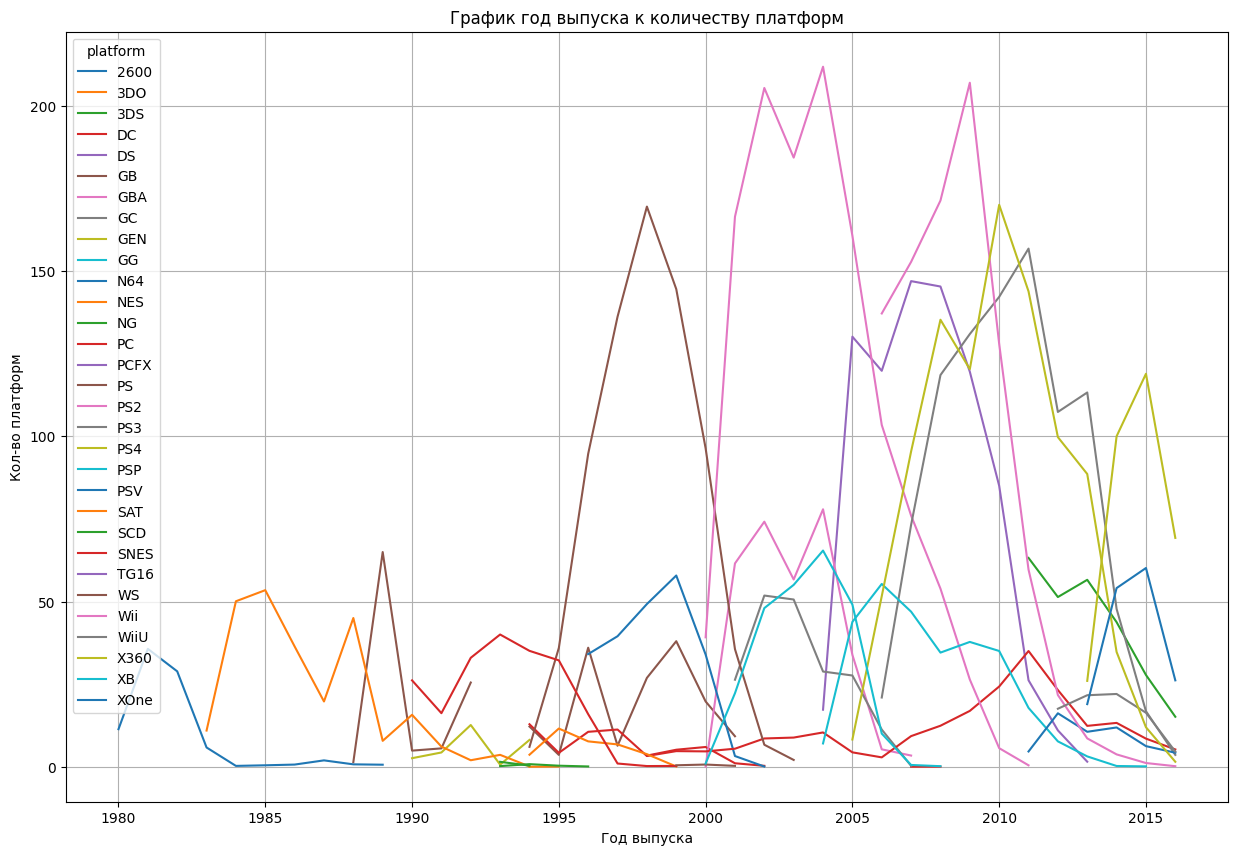

In [25]:
data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))
plt.title('График год выпуска к количеству платформ')
plt.xlabel('Год выпуска');
plt.ylabel('Кол-во платформ');
plt.show();

Здесь можно заметить, что в периоде 2005 - 2010 годах некоторые приставки и устройства появились и исчезались. Рассмотрим это в отдельном графике

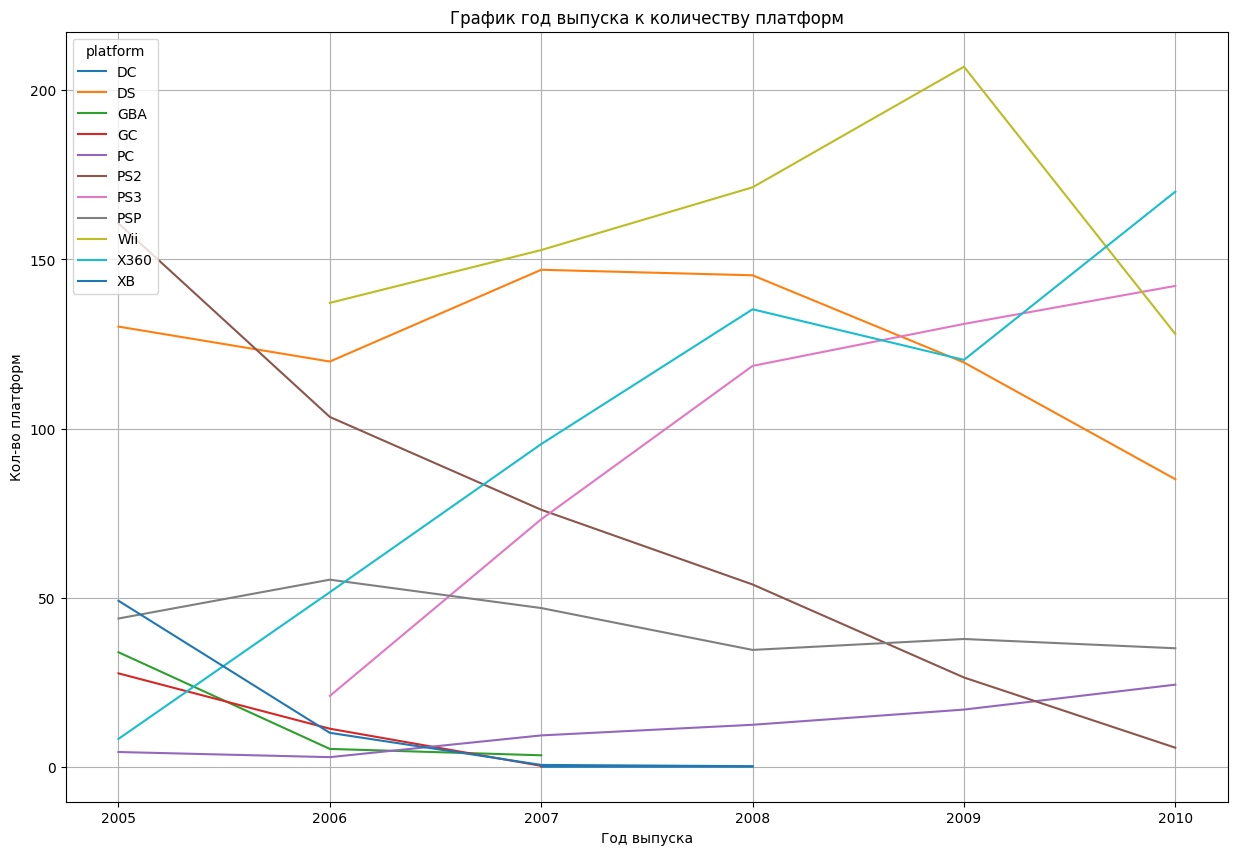

In [26]:
# Для анализа данных лучше всего взять промежуток 2005 - 2010, 
# т.к. этот период, судя по графику, является бурным ростом кол-во игр
# Также появление новых приставок и других перифейных устройств, платформ

data_2005_for_2010 = data[(data['year_of_release'] >= 2005) & (data['year_of_release'] <= 2010)]
data_2005_for_2010.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))
plt.title('График год выпуска к количеству платформ')
plt.xlabel('Год выпуска');
plt.ylabel('Кол-во платформ');
plt.show();

Здесь видно, что из рынка устройств по играм вышли платформы: GBA, DC, GC

А появились: PS3, Wii, X360

Характерный срок составляет 1 год

Одновременно появились платформы: PS3 и Wii

### Список платформ, выпущенных 2013 - 2016 году

In [27]:
# Теперь рассмотрим платформ, выпущенных 2013 - 2016, чтобы взять данные за актуальные периоды на 2017

data_2013_for_2016 = data[(data['year_of_release'] >= 2013) & (data['year_of_release'] <= 2016)]
data_2013_for_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


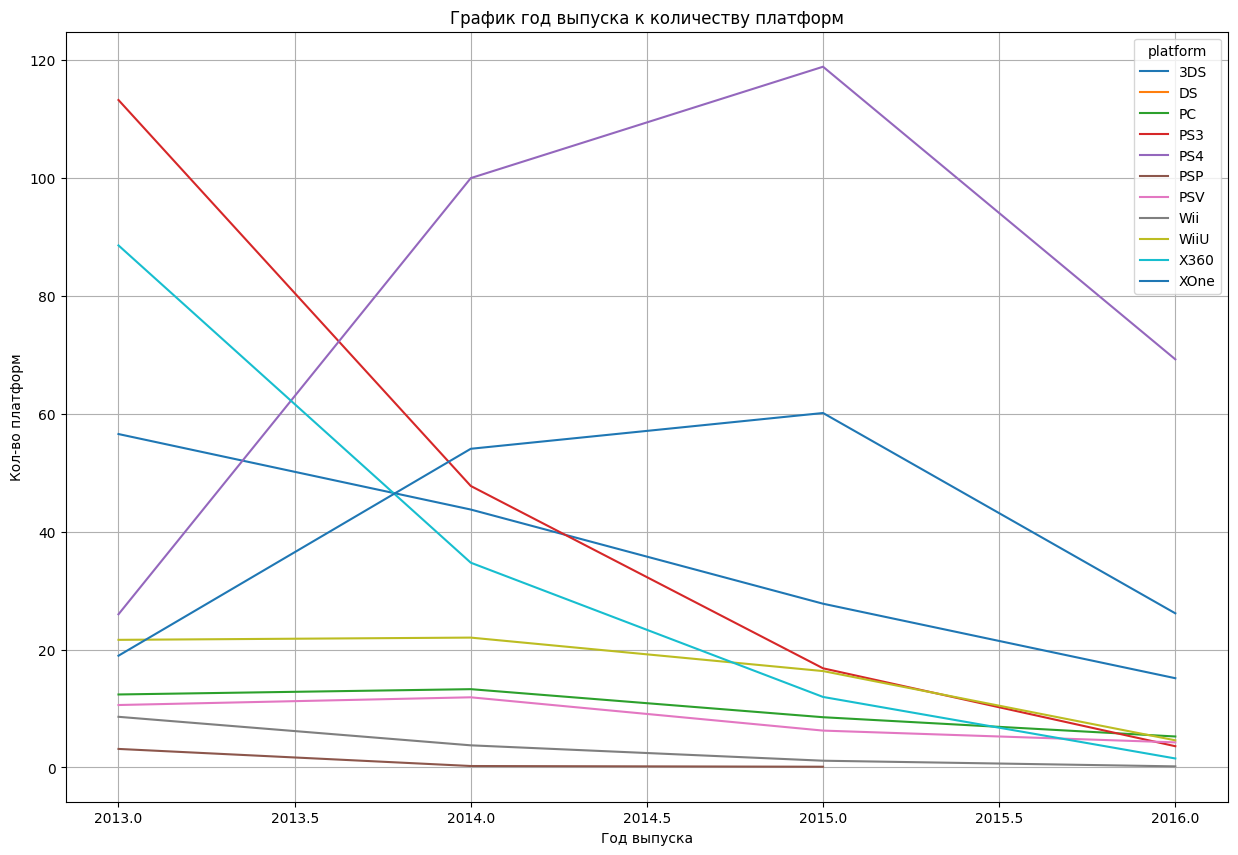

In [28]:
data_2013_for_2016.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))
plt.title('График год выпуска к количеству платформ')
plt.xlabel('Год выпуска');
plt.ylabel('Кол-во платформ');
plt.show();

Здесь можно заметить, что игровые приставки (платформы): PS4 и 3DS к 2015 году подошли к росту, но после 2015 подошли к убытку. А у остальных платформ идут к убытку, а платформа PSP вышла с рынка в 2015 году 

Стабильно держатся эти Wii, PC, PSV, но претерпевают малое количество убытки

In [29]:
# Платформа, имеюищаяся огромные копии за продажи
data_2013_for_2016.pivot_table(index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
PS4,141.09,15.96,108.74,48.35,314.14
PS3,67.81,23.35,63.50,26.77,181.43
XOne,51.59,0.34,93.12,14.27,159.32
3DS,30.96,67.81,38.20,6.28,143.25
X360,42.52,0.51,81.66,12.11,136.80
WiiU,19.85,10.88,29.21,4.69,64.63
PC,25.36,0.00,11.11,2.96,39.43
PSV,6.10,18.59,5.04,3.26,32.99
Wii,5.93,0.05,6.56,1.12,13.66


Приставки, имеющие огромные копии за продажи: PS4, XOne, 3DS, X360, PS3

In [30]:
data_2013_for_2016 = data_2013_for_2016.query("platform == ['PS4', 'XOne', '3DS', 'X360', 'PS3']")

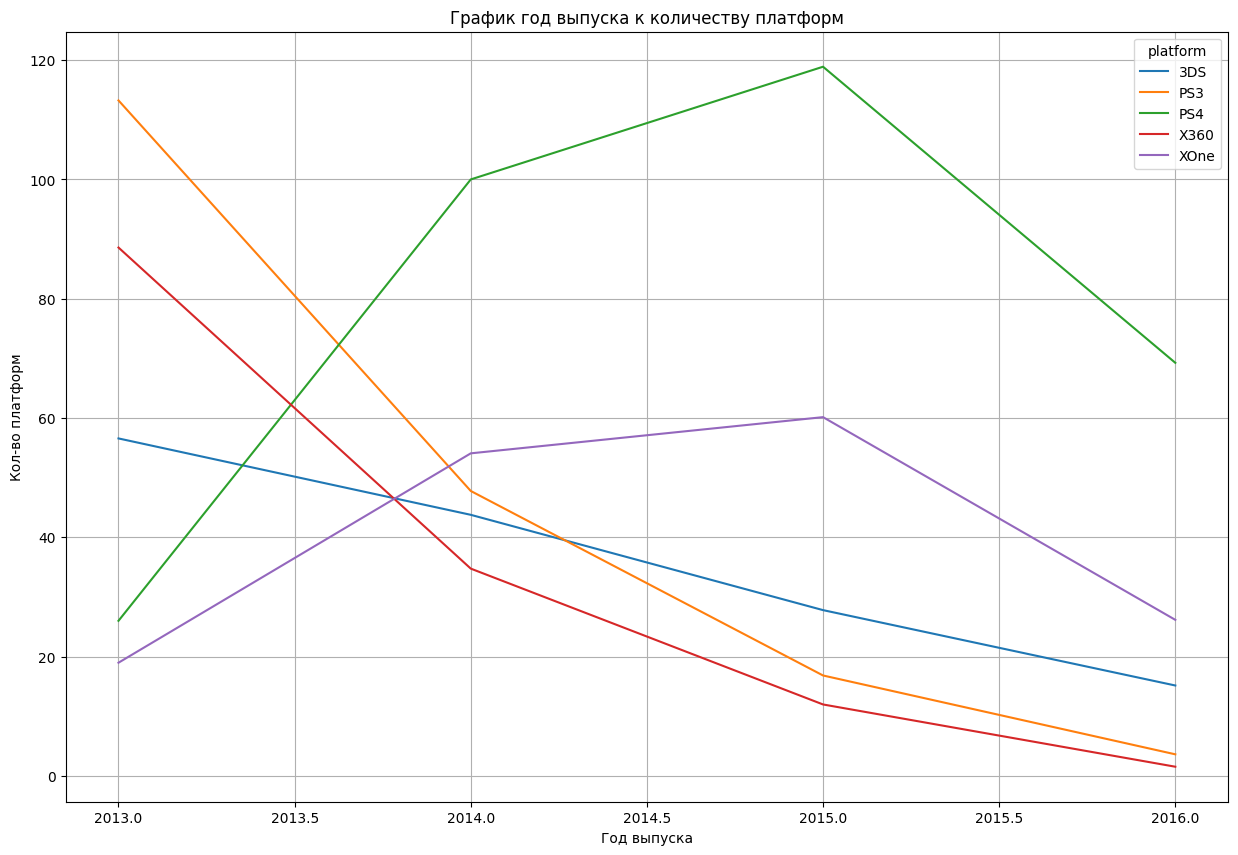

In [31]:
data_2013_for_2016.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))
plt.title('График год выпуска к количеству платформ')
plt.xlabel('Год выпуска');
plt.ylabel('Кол-во платформ');
plt.show();

Платформы, лидирующие по продажам: PS4 и XOne

Здесь видно, что вниз уходит сильнее всего это платформа: X360. Второе место после нее занимает PS3

Более менее стабильно держатся платформа: 3DS, но все равно идет вниз

Потенциальным прибыльным можно считать платформу: PS4 и XOne, не смотря на то, что идет в убытку, они имеют достаточные внушительные суммарные копии

### Исследование графика ящик с усами по глобальным продажам игр в разбивке по платформам

In [32]:
# Построим график ящик с усами по глобальным продажам игр в разбивке по платформам
data_2013_for_2016.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39


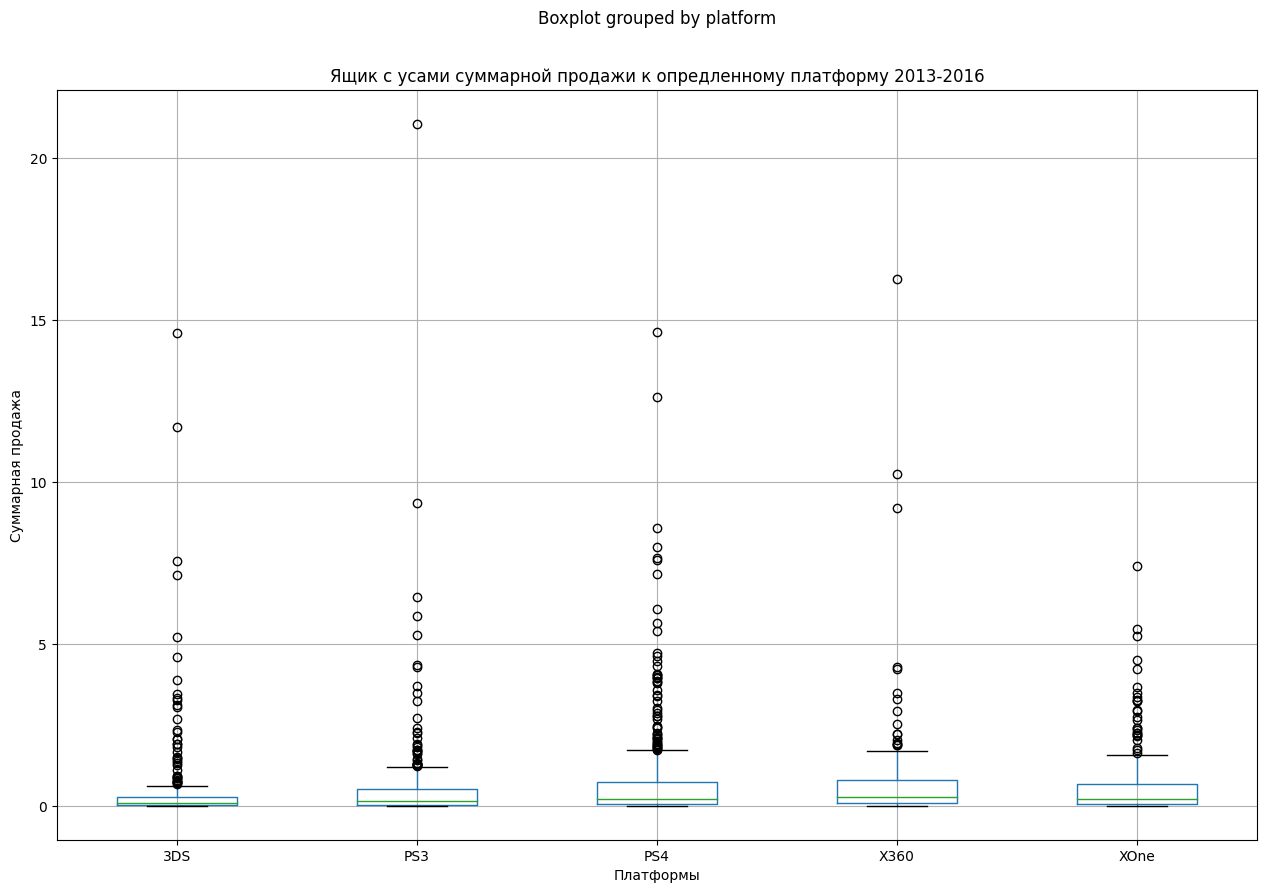

In [33]:
# Построим общую диаграмму размаха
data_2013_for_2016.boxplot(column='sum_sales', by='platform', figsize=(15, 10));
plt.title('Ящик с усами суммарной продажи к опредленному платформу 2013-2016');
plt.xlabel('Платформы');
plt.ylabel('Суммарная продажа');
plt.show();

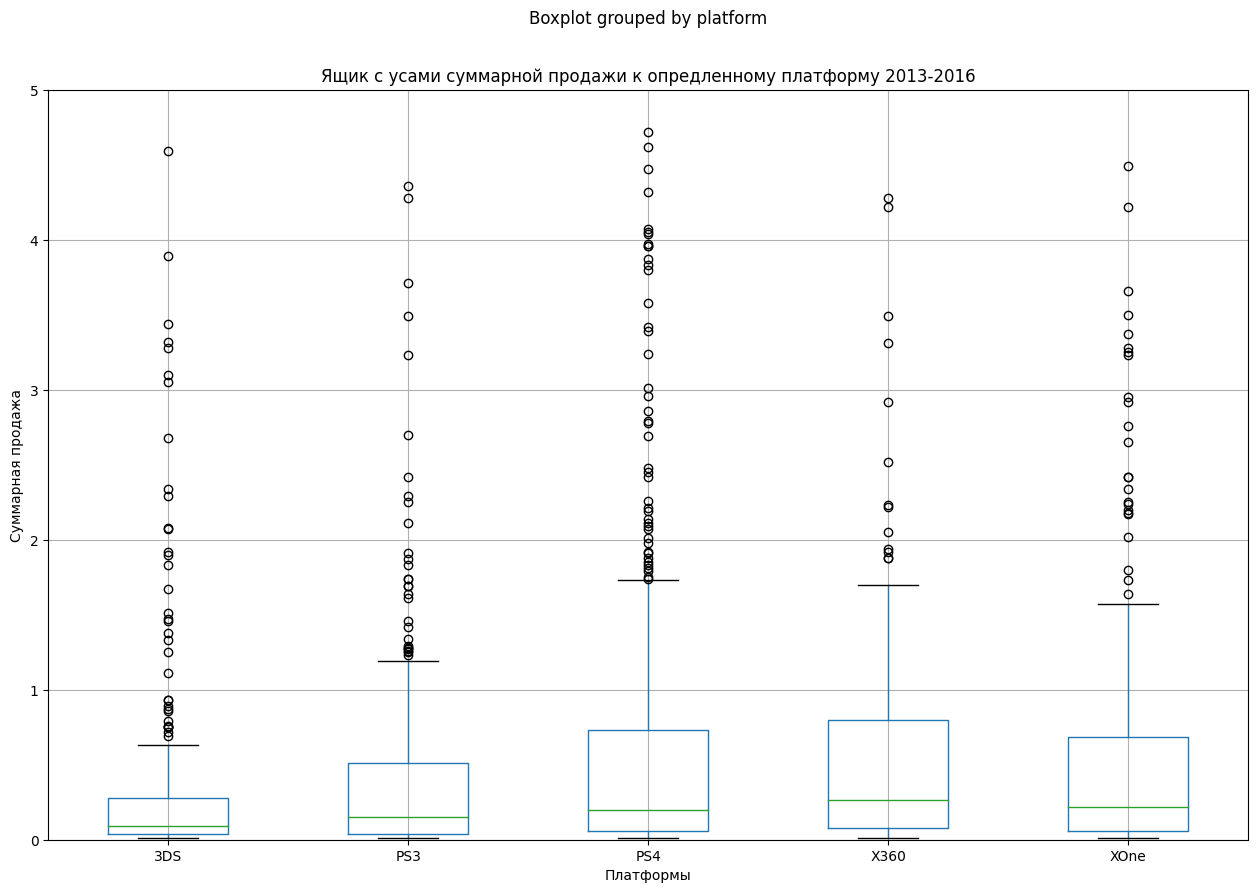

In [34]:
# Создадим интервал до 5 млн
data_2013_for_2016.boxplot(column='sum_sales', by='platform', figsize=(15, 10))
plt.ylim(0, 5.0)

plt.title('Ящик с усами суммарной продажи к опредленному платформу 2013-2016');
plt.xlabel('Платформы');
plt.ylabel('Суммарная продажа');
plt.show();

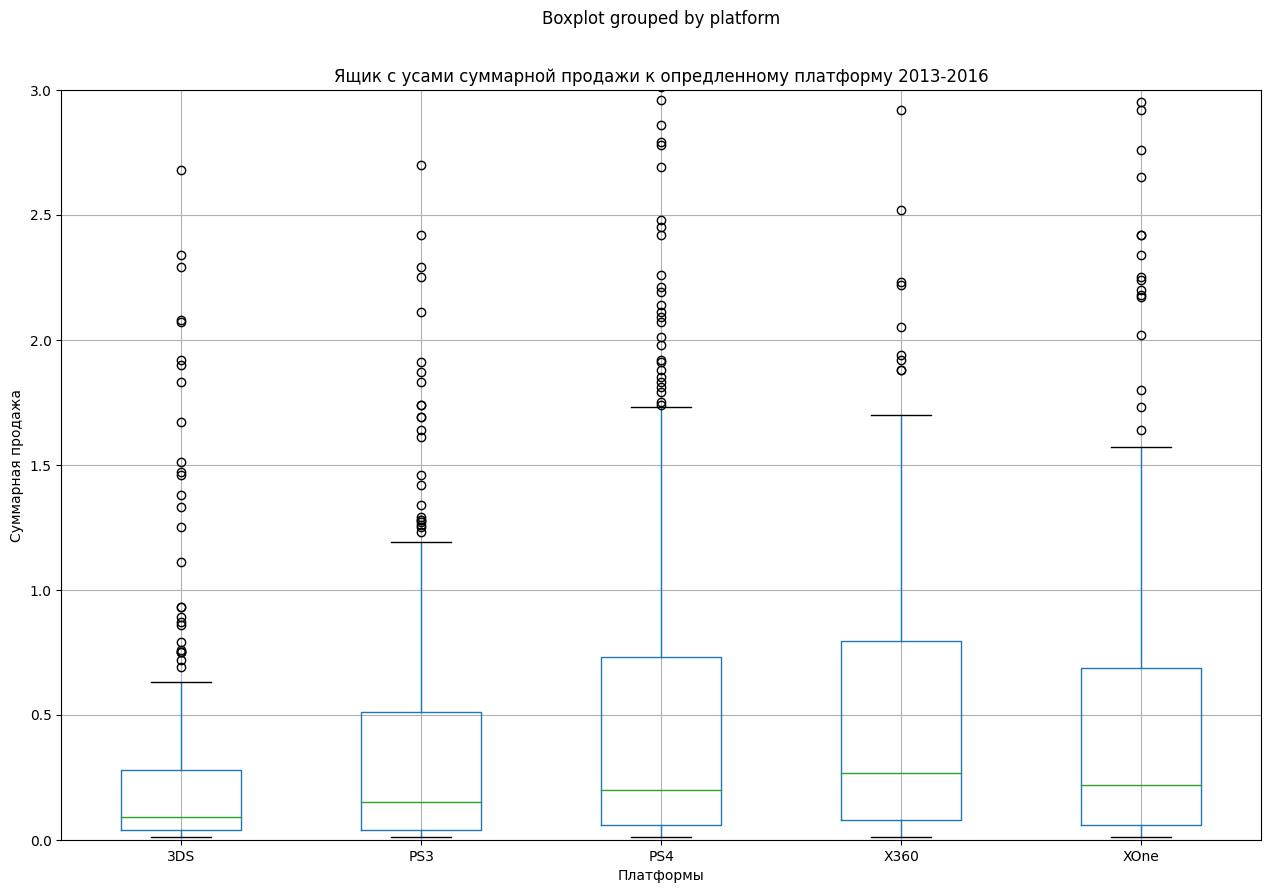

In [35]:
# Попробуем еще создадть интервал до 3 млн
data_2013_for_2016.boxplot(column='sum_sales', by='platform', figsize=(15, 10))
plt.ylim(0, 3.0)

plt.title('Ящик с усами суммарной продажи к опредленному платформу 2013-2016');
plt.xlabel('Платформы');
plt.ylabel('Суммарная продажа');
plt.show();

Здесь можно заметить, что существуют большие выбросы у платформ. Но будем предположить, что выбросов не существуют и опираемся на существующих значениях. То здесь получается, что PS4 занимает неплохую позицию в продажах копий игр, но X360 не уступает ее.

3DS, к сожалению, не является внушительной кол-во копией игр для игровой платформы

### Диаграмма рассеяния

#### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

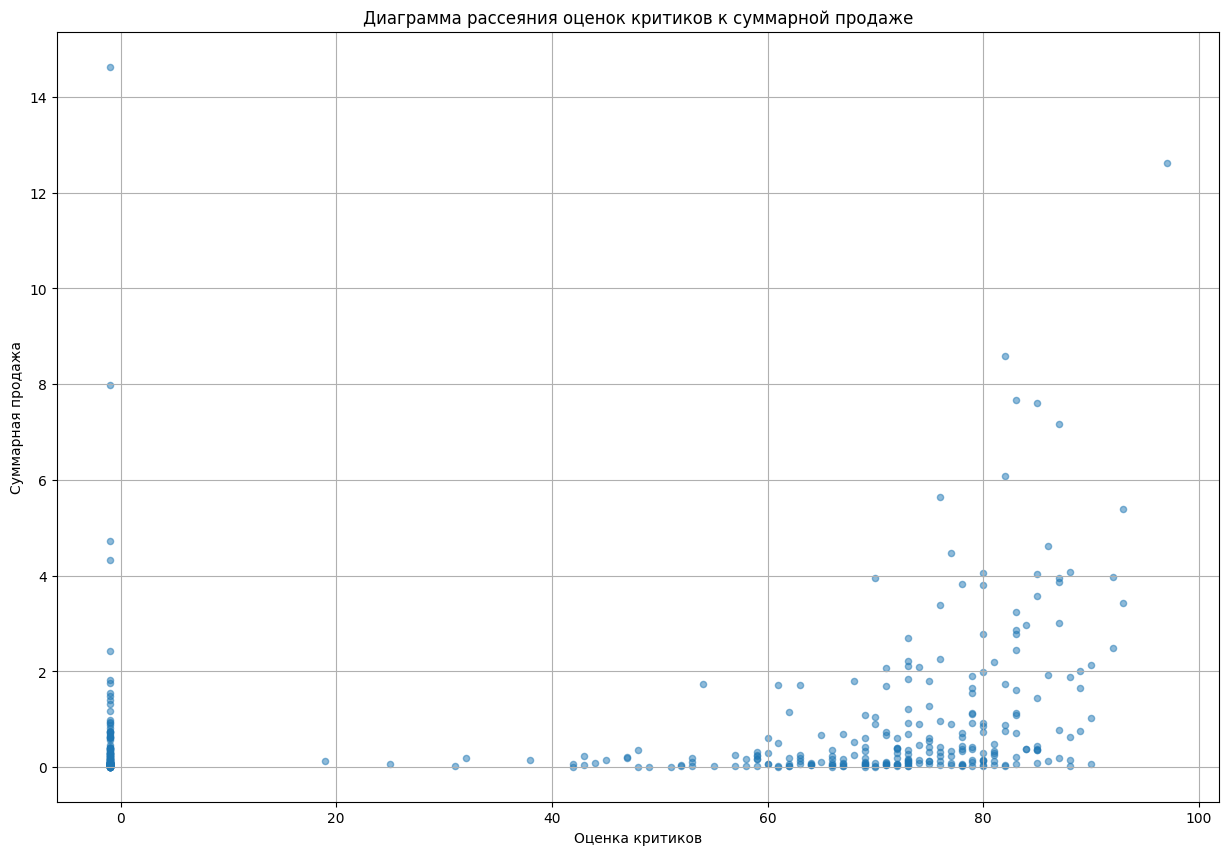

In [36]:
# Наблюдаем влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков
# Построим диаграмму рассеяния

# Оценки критиков
data_2013_for_2016[data_2013_for_2016['platform'] == 'PS4'].plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, figsize=(15,10), grid = True)
plt.title('Диаграмма рассеяния оценок критиков к суммарной продаже');
plt.xlabel('Оценка критиков');
plt.ylabel('Суммарная продажа');
plt.show();

#### Оценки пользователей

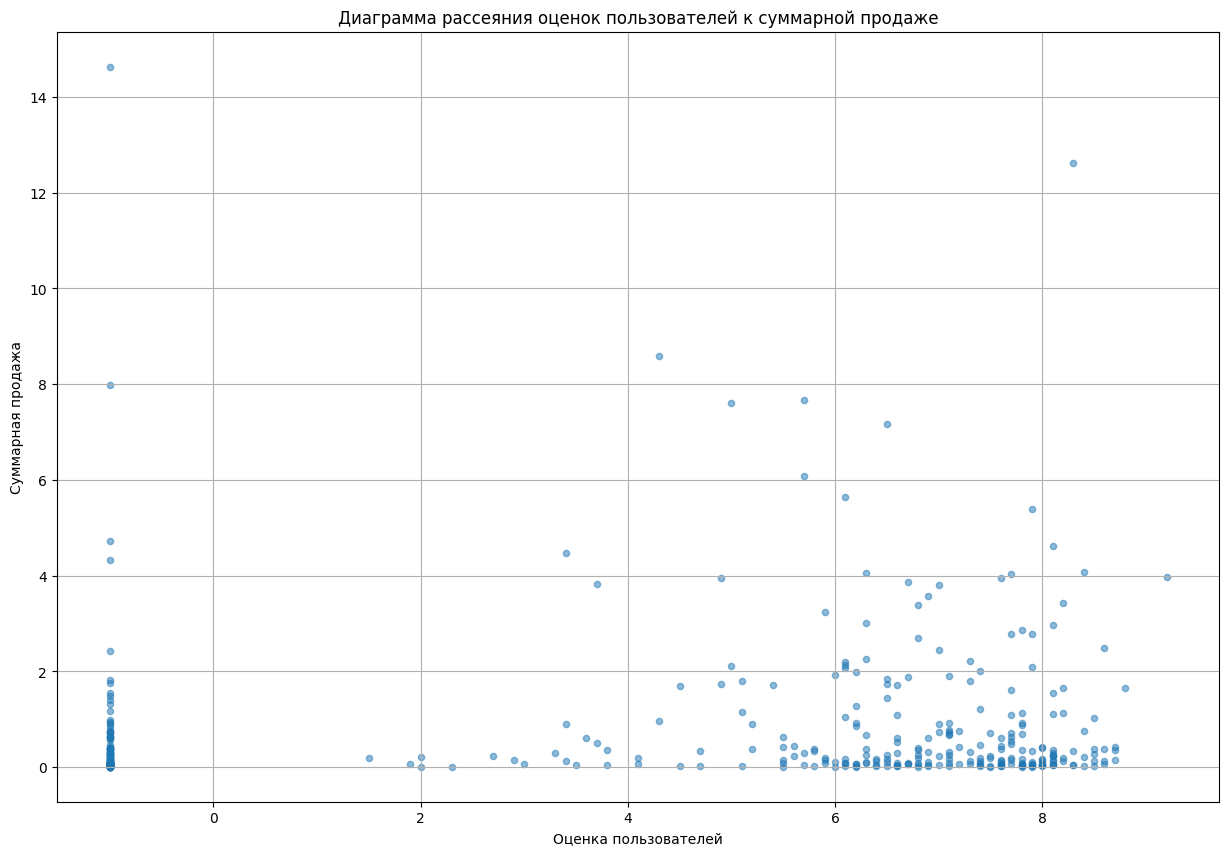

In [37]:
# Оценки пользователей
data_2013_for_2016[data_2013_for_2016['platform'] == 'PS4'].plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, figsize=(15,10), grid = True)
plt.title('Диаграмма рассеяния оценок пользователей к суммарной продаже');
plt.xlabel('Оценка пользователей');
plt.ylabel('Суммарная продажа');
plt.show();

### Корреляция

#### Корреляция между отзывами и продажами, не учитывая "заглушки"

In [38]:
# Посчитаем корреляцию между отзывами и продажами, не учитывая "заглушки", т.е. "-1"
data_2013_for_2016_ps4 = data_2013_for_2016[(data_2013_for_2016['platform'] == 'PS4') & (data_2013_for_2016['user_score'] != -1) & (data_2013_for_2016['critic_score'] != -1)]

In [39]:
data_2013_for_2016_ps4_correlation_user_score = data_2013_for_2016_ps4['user_score'].corr(data_2013_for_2016_ps4['sum_sales'])
print(f'Корреляция отзывами пользователя слабо отрицательная: {data_2013_for_2016_ps4_correlation_user_score}')

Корреляция отзывами пользователя слабо отрицательная: -0.03362497596528878


In [40]:
data_2013_for_2016_ps4_correlation_critic_score = data_2013_for_2016_ps4['critic_score'].astype(float).corr(data_2013_for_2016_ps4['sum_sales'])
print(f'Корреляция отзывами критиков слабо положительная: {data_2013_for_2016_ps4_correlation_critic_score}')

Корреляция отзывами критиков слабо положительная: 0.40589480145836687


Можно сделать вывод, что большая часть продажи копией зависит от наличия высоких оценок 

In [41]:
# Создадим функцию, которая будет вывести на экран тип корреляции
def type_correlation(corr):
    if(corr > 0):
        if(corr > 1):
            print(f'Корреляция сильно положительная: {corr:.3f}')
        else:
            print(f'Корреляция слабо положительная: {corr:.3f}')
    else:
        if(corr_user_score < -1):
            print(f'Корреляция сильно отрицательная: {corr:.3f}')
        else:
            print(f'Корреляция слабо отрицательная: {corr:.3f}')

In [42]:
# Создадим отдельный датасет без заглушек
data_2013_for_2016_new = data_2013_for_2016[(data_2013_for_2016['user_score'] != -1) & (data_2013_for_2016['critic_score'] != -1)]

#### Корреляция других платформ

In [43]:
print('='*50)
# Рассмотрим корреляцию других платформ
for platform in  data_2013_for_2016_new['platform'].unique():
    data_platform = data_2013_for_2016_new[data_2013_for_2016_new['platform'] == platform]
    
    corr_user_score = data_platform['user_score'].corr(data_platform['sum_sales'])
    corr_critic_score = data_platform['critic_score'].astype(float).corr(data_platform['sum_sales'])
    print(f'Пользовательские рейтинги платформ {platform}:')
    type_correlation(corr_user_score)
    print('-'*50)
    print(f'Рейтинги критик платформ {platform}:')
    type_correlation(corr_critic_score)
    print('='*50)

Пользовательские рейтинги платформ PS3:
Корреляция слабо положительная: 0.023
--------------------------------------------------
Рейтинги критик платформ PS3:
Корреляция слабо положительная: 0.334
Пользовательские рейтинги платформ X360:
Корреляция слабо отрицательная: -0.006
--------------------------------------------------
Рейтинги критик платформ X360:
Корреляция слабо положительная: 0.350
Пользовательские рейтинги платформ PS4:
Корреляция слабо отрицательная: -0.034
--------------------------------------------------
Рейтинги критик платформ PS4:
Корреляция слабо положительная: 0.406
Пользовательские рейтинги платформ XOne:
Корреляция слабо отрицательная: -0.094
--------------------------------------------------
Рейтинги критик платформ XOne:
Корреляция слабо положительная: 0.410
Пользовательские рейтинги платформ 3DS:
Корреляция слабо положительная: 0.273
--------------------------------------------------
Рейтинги критик платформ 3DS:
Корреляция слабо положительная: 0.339


С платформой PS4 уже рассмотрели, теперь рассмотрим других платформ

С платформой PS3 видно, что есть некоторые слабые зависимости от оценок и продажей копии

С платформой X360 корреляция пользователя незначительно маленькие, а корреляция критика больше корреляции пользователя, то можно сказать, что есть некая зависимость между оценкой и продажей копией

С платформой XOne аналогичная ситуация с предыдущем пункте

С платформой 3DS есть некая зависимость между оценкой и продажей копией, но теснее чем PS3

Рассмотрим общее распределение игр по жанрам

### Общее распределение игр по жанрам

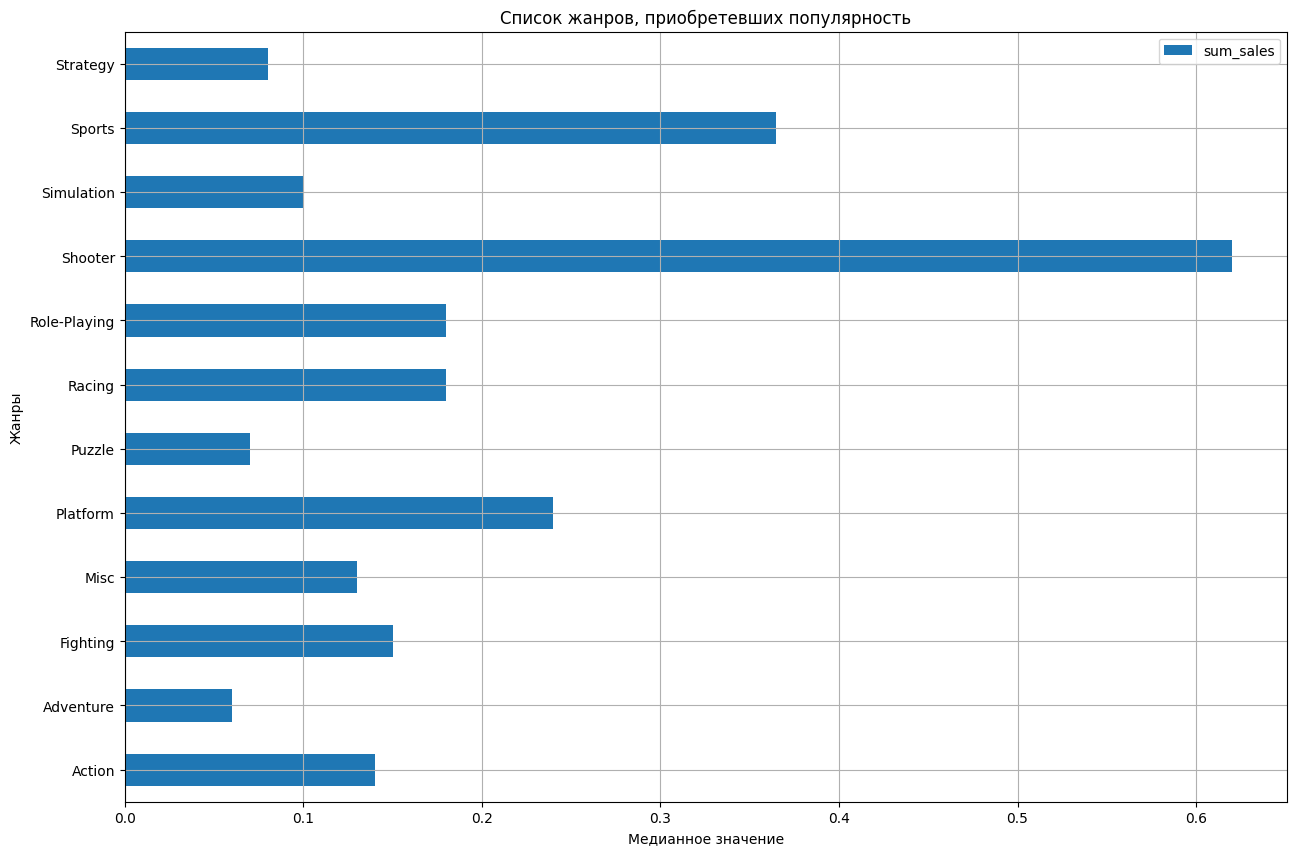

In [44]:
# Здесь рассмотрим общее распределение игр по жанрам медианным значением, 
# т.к. мы уже выше рассмотрели, что существуют выбросы
data_2013_for_2016.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median') \
.plot(
    kind = 'barh',
    title = 'Список жанров, приобретевших популярность',
    grid = True,
    figsize = (15, 10)
)

plt.title('Список жанров, приобретевших популярность');
plt.xlabel('Медианное значение');
plt.ylabel('Жанры');
plt.show();

Здесь можно заметить, что есть хиты по продажам: Shooter, Sports и Platform (Самые прибыльные)

Но также не уступают их по месту: Role-Playing и Racing

Список жанров, которые мало получили популярность: Adventure, Puzzle, Strategy (Самые убыльные)

Более мене популярностью занимают: Simulation и Misc

## Потреты пользователя каждого региона

### Северная Америка (NA)

Рассмотрим и опишем портрет пользователей региона Северной Америки (NA)

#### Популярные платформы на Северной Америке

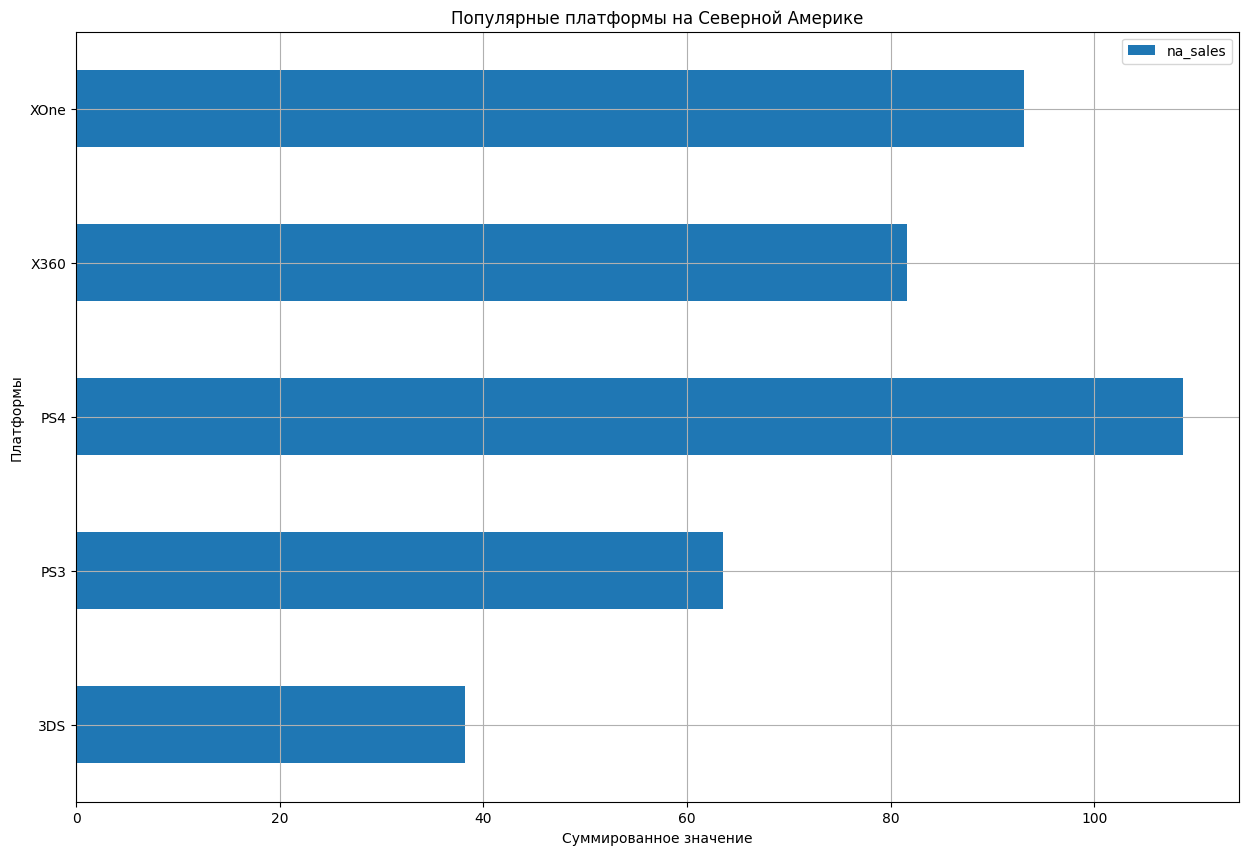

In [45]:
data_2013_for_2016.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Популярные платформы на Северной Америке',
    grid = True,
    figsize = (15, 10)
)
plt.title('Популярные платформы на Северной Америке');
plt.xlabel('Суммированное значение');
plt.ylabel('Платформы');
plt.show();

Американцы предпочитают больше всего играть на платформе: PS4, XOne, X360

Меньше всего - PS3, 3DS

Поскольку нам известно, что платформа X360 является американской, а PS4, PS3 - японские, но большинство люди пользуются PS4

Теперь рассмотрим предпочитаемые жанры в Северной Америке

#### Популярные жанры на Северной Америке

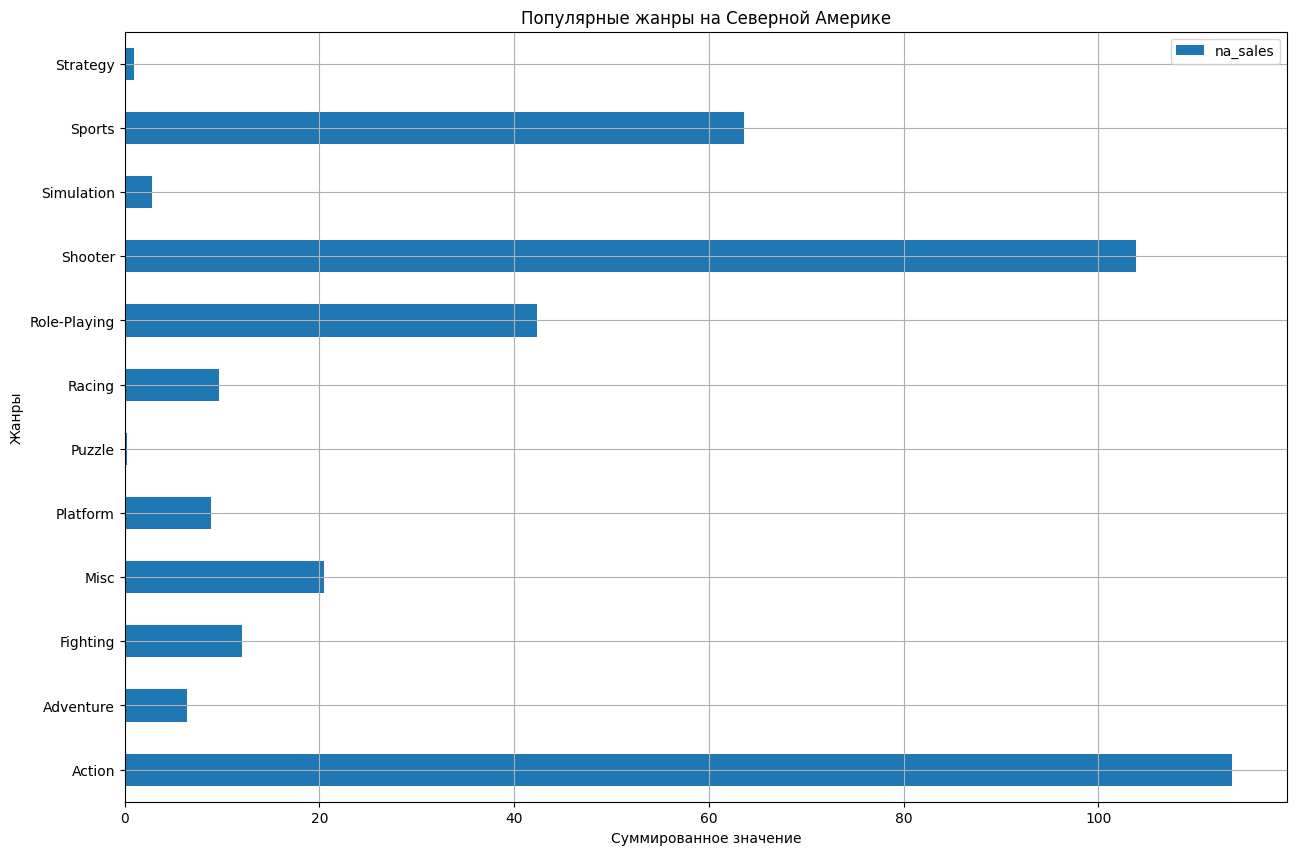

In [46]:
data_2013_for_2016.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Популярные жанры на Северной Америке',
    grid = True,
    figsize = (15, 10)
)
plt.title('Популярные жанры на Северной Америке');
plt.xlabel('Суммированное значение');
plt.ylabel('Жанры');
plt.show();

Американцы предпочитают больше всего играть на жанрах: Action, Shooter, Sports, Role-Playing и Misc

А меньше всего - Puzzle, Strategy, Simulation, Adventure и Platform

Рассмотрим теперь рейтинг ESRB на продажи в регионе Северной Америке

#### Рейтинги в Северной Америке

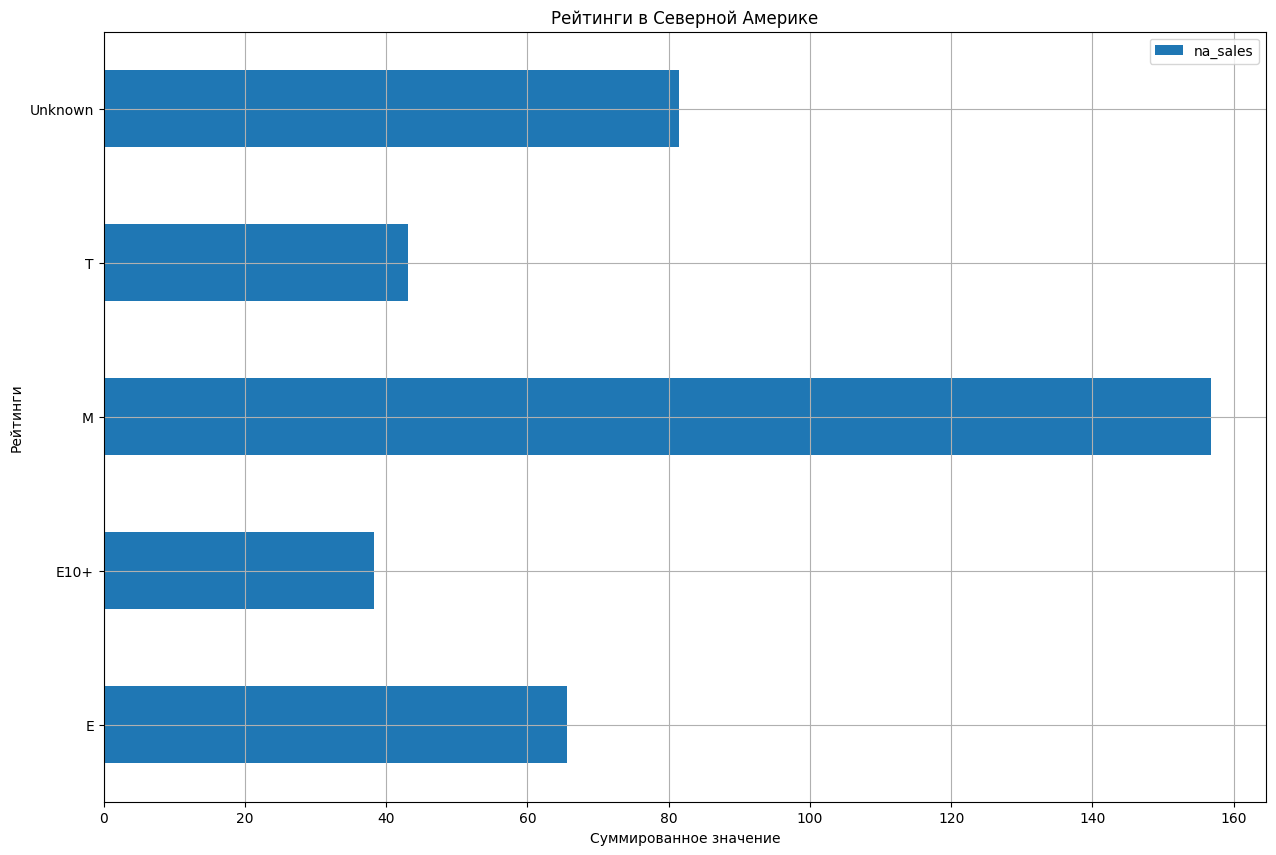

In [47]:
data_2013_for_2016.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Рейтинги в Северной Америке',
    grid = True,
    figsize = (15, 10)
)
plt.title('Рейтинги в Северной Америке');
plt.xlabel('Суммированное значение');
plt.ylabel('Рейтинги');
plt.show();

Здесь получается, что американцы больше всего играют в играх, у которых рейтинг M (старше 16 лет). Второе место занимает - рейтинг Е (старше 5 лет), третье - рейтинг Т (старше 13 лет)

Существуют игры, у которых рйтинг не устанавливался, это подразумевается в том, что игра создала не в Северной Америке, т.е. рейтинг не установлен под ESRB

Можно сделать вывод, что здесь большинство американцы в возрасте около или старше 16 (в большинствах случаях) лет играют в основном на платформах PS4, XOne, X360 в жанрах Action, Shooter, Sports, Role-Playing и Misc

### Европейский регион (EU)

Рассмотрим и опишем портрет пользователей Европейского региона (EU)

#### Популярные платформы в Европе

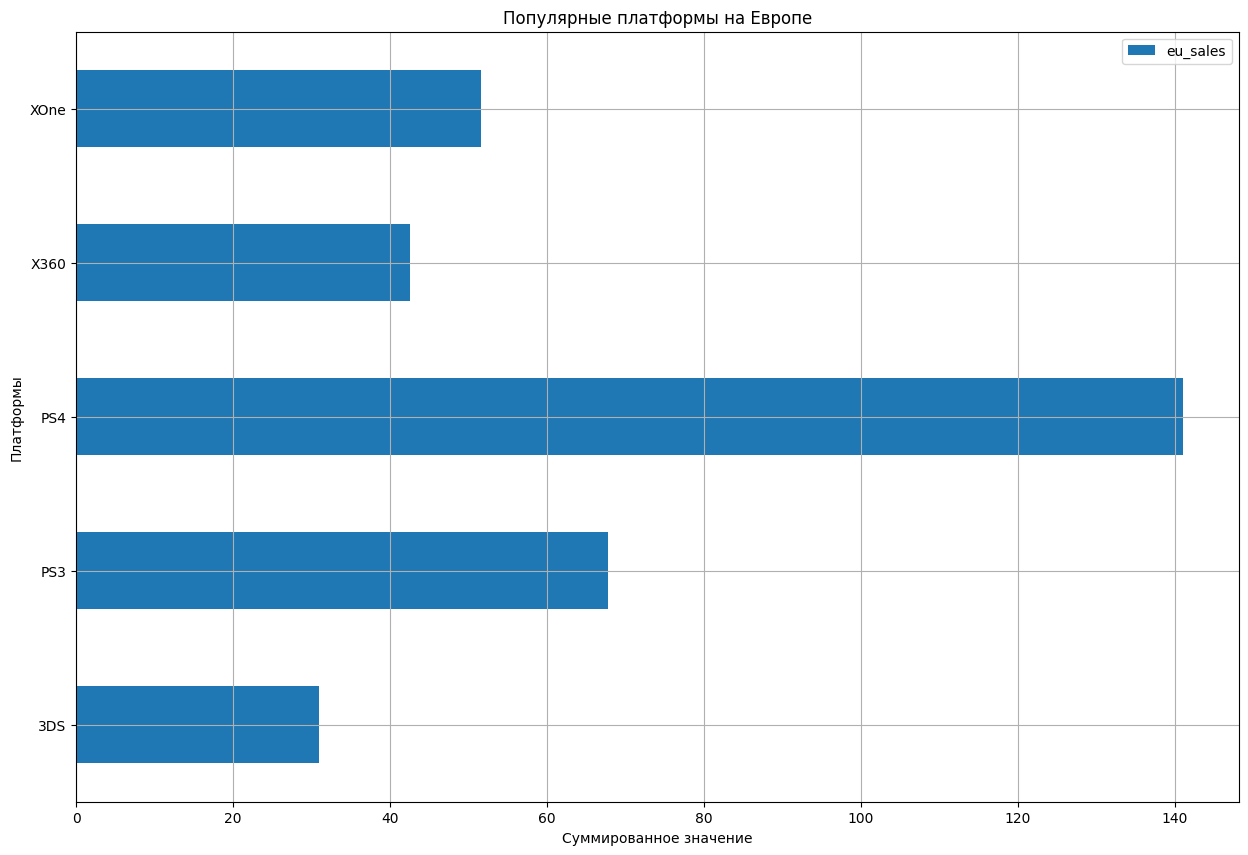

In [48]:
data_2013_for_2016.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Популярные платформы в Европе',
    grid = True,
    figsize = (15, 10)
)
plt.title('Популярные платформы на Европе');
plt.xlabel('Суммированное значение');
plt.ylabel('Платформы');
plt.show();

Европейцы предпочитают больше всего играть на платформе: PS4, PS3, XOne

Видно, что большинство европейцам понравилось японские платформы, но не стоит отрицать платформу американского производителя - XOne

А меньше всего - 3DS, X360

#### Популярные жанры в Европе

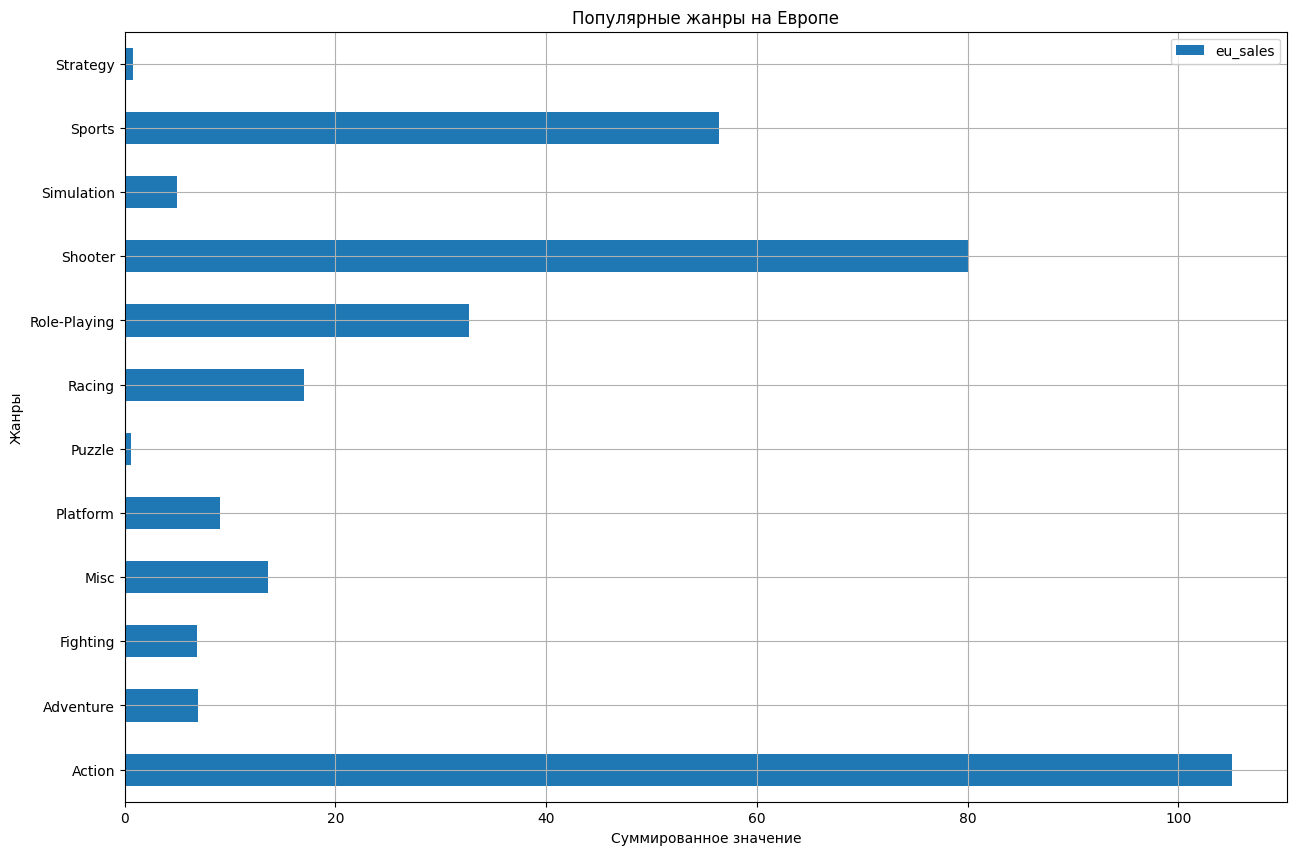

In [49]:
data_2013_for_2016.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Популярные жанры в Европе',
    grid = True,
    figsize = (15, 10)
)
plt.title('Популярные жанры на Европе');
plt.xlabel('Суммированное значение');
plt.ylabel('Жанры');
plt.show();

Европейцы предпочитают больше всего играть на жанрах: Action, Shooter, Sports, Role-Playing и Racing

А меньше всего - Strategy, Puzzle, Simulation, Adventure и Fighting 

Вкусы европейского и американского пользователя совпадают в большинствах случаях


Рассмотрим теперь рейтинг ESRB на продажи в регионе Европы

#### Рейтинги в Европе

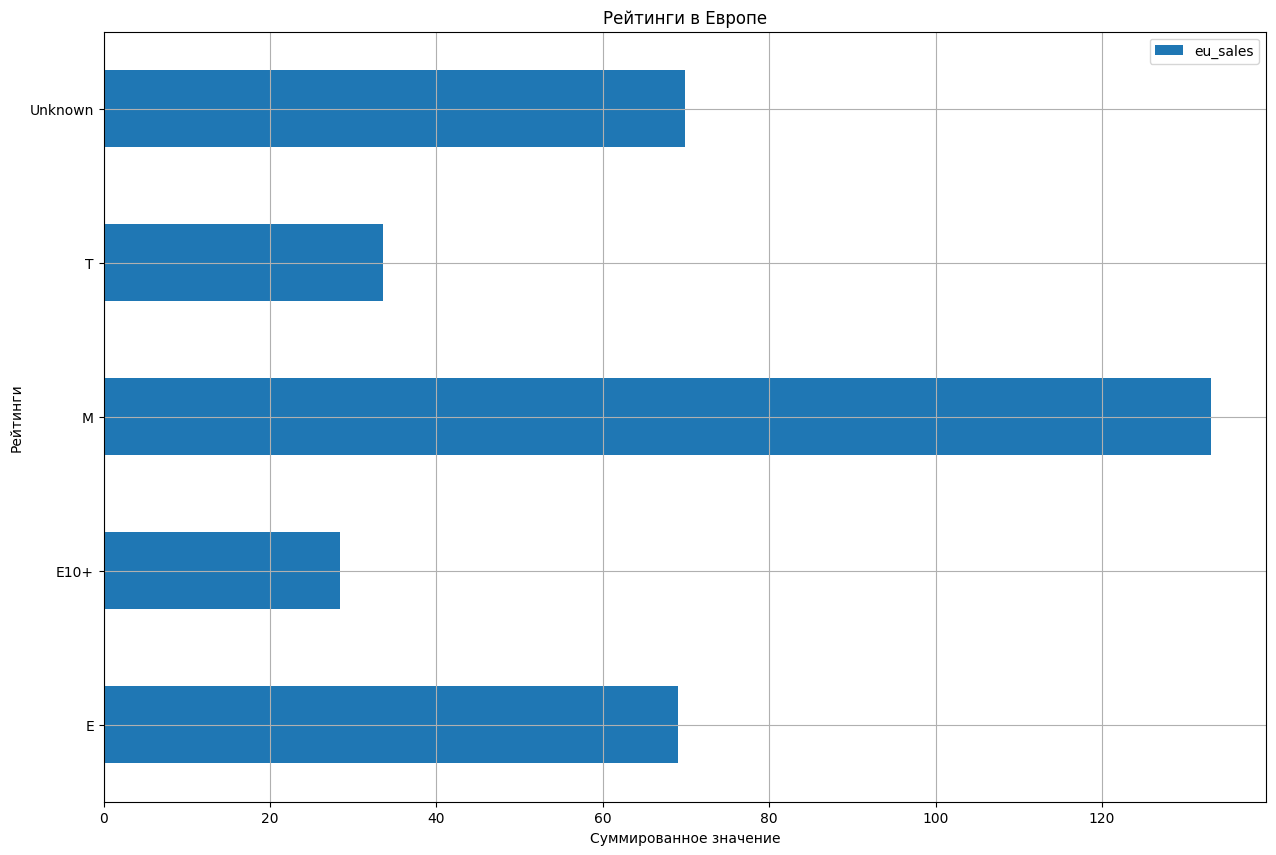

In [50]:
data_2013_for_2016.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Рейтинги в Европе',
    grid = True,
    figsize = (15, 10)
)
plt.title('Рейтинги в Европе');
plt.xlabel('Суммированное значение');
plt.ylabel('Рейтинги');
plt.show();

Здесь получается, что европейцы больше всего играют в играх, у которых рейтинг М (старше 16 лет), а второе место - рейтинг Е (старше 5 лет), а третье - рейтинг Т (старше 13 лет). 
Малое количество занимает рейтинг E10+ (старше 10 лет)

Здесь также не исключено случай с рейтингом "Unknown"

Можно сделать вывод, что здесь большинство европейцы совпадают с вкусом и предпочтением американца, но играют в основном на японских платформах

### Японский регион (JP)

Рассмотрим и опишем портрет пользователей Японского региона (JP)

#### Популярные платформы в Японии

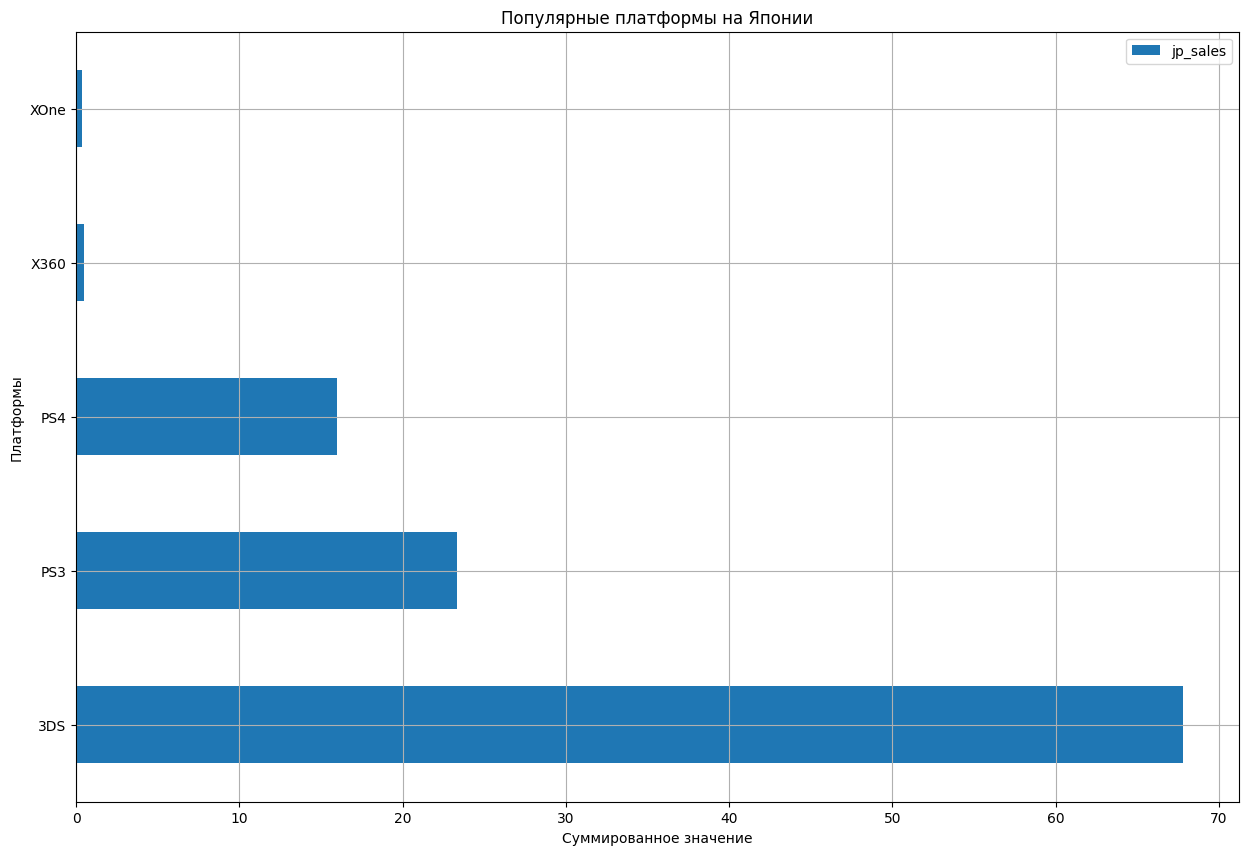

In [51]:
data_2013_for_2016.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Популярные платформы в Японии',
    grid = True,
    figsize = (15, 10)
)
plt.title('Популярные платформы на Японии');
plt.xlabel('Суммированное значение');
plt.ylabel('Платформы');
plt.show();

Японцы предпочитают больше всего играть на платформах: 3DS, PS3, PS4

Очевидно и сразу видно, что большинство японцы пользуются в основном свои японские платформы

А меньше всего американские платформы - XOne и X360

#### Популярные жанры в Японии

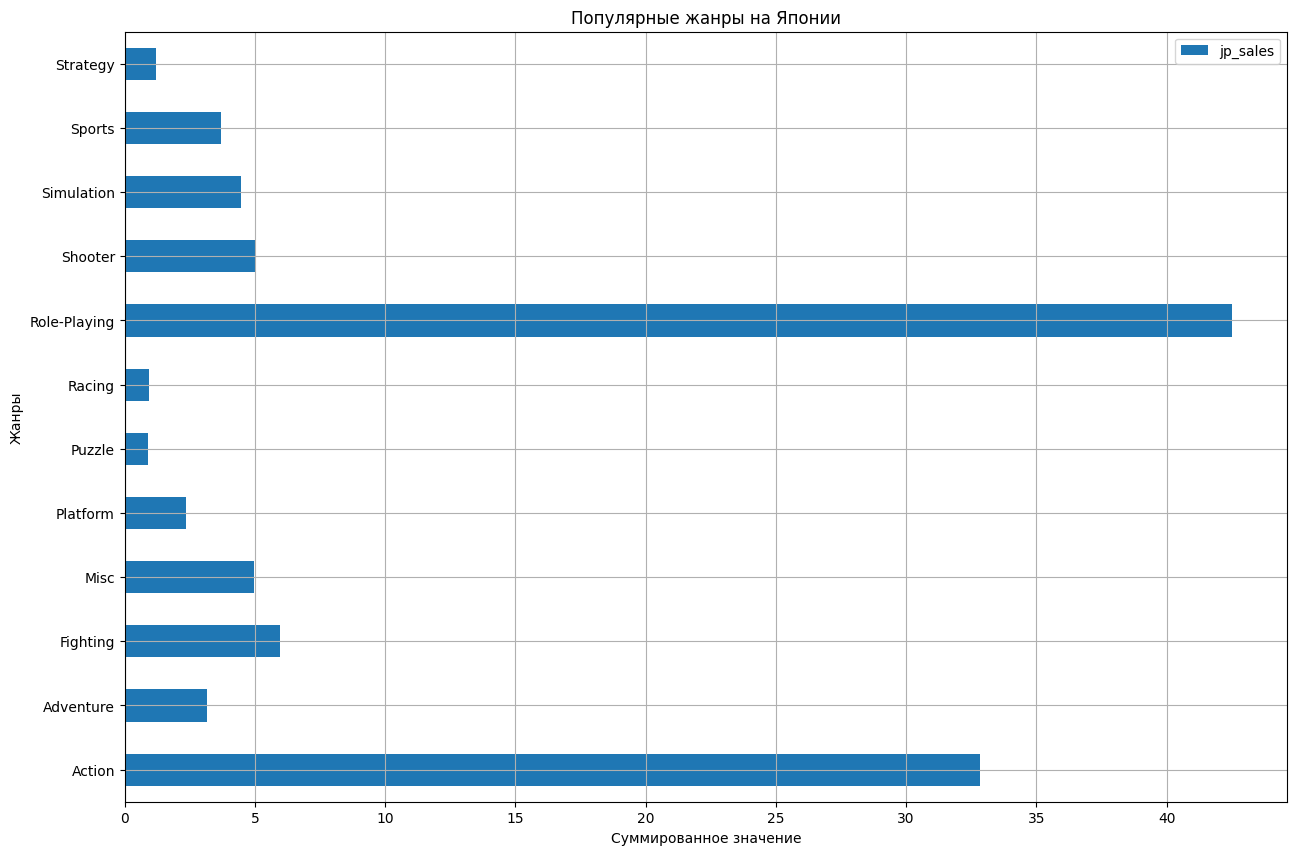

In [52]:
data_2013_for_2016.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Популярные жанры в Японии',
    grid = True,
    figsize = (15, 10)
)
plt.title('Популярные жанры на Японии');
plt.xlabel('Суммированное значение');
plt.ylabel('Жанры');
plt.show();

Японцы предпочитают больше всего играть на жанрах: Role-Playing, Action, Fighting, Msis и Shooter

А меньше всего - Racing, Puzzle, Strategy, Platform и Adventure

Вкусы японского пользователя кардинально отличаются от европейских и американских пользователей

#### Рейтинги в Японии

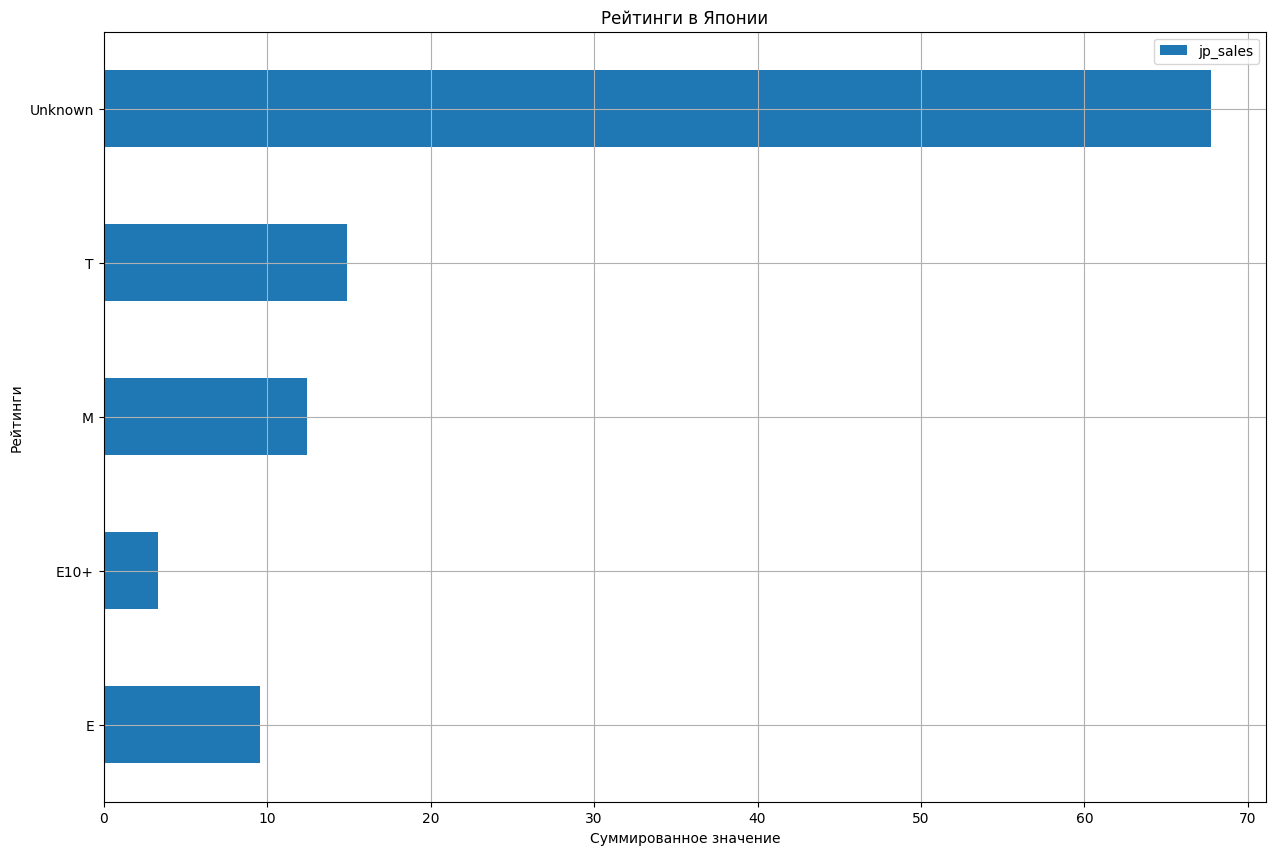

In [53]:
data_2013_for_2016.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum') \
.plot(
    kind = 'barh',
    title = 'Рейтинги в Японии',
    grid = True,
    figsize = (15, 10)
)
plt.title('Рейтинги в Японии');
plt.xlabel('Суммированное значение');
plt.ylabel('Рейтинги');
plt.show();

В большинствах играх, в которых японцы играют, не установлены рейтинги и остаются неизвестными для нас.

Пусть не будем опираться на неизвестных рейтингах, тогда здесь получается, что японцы, как и в остальных большинствах случаях, больше всего играют в играх, у которых рейтинг Т (старше 13 лет), а второе место - рейтинг М (старше 16 лет), а третье - рейтинг Е (старше 5 лет). 
Малое количество занимает рейтинг E10+ (старше 10 лет).

Можно сделать вывод, что здесь большинство юные японцы играют на японских платформах, а их любимые жанры - Role-Playing

## Проверка гипотезы

### Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

H0: Средние пользовательские рейтинги платформ одинаковые

H1: Средние пользовательские рейтинги платформ разные

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sum_sales        16713 non-null  float64
dtypes: Int32(2), float64(6), object(4)
memory usage: 1.6+ MB


In [55]:
# Создадим датасет без заглушек
new_data = data[data['user_score'] != -1]

# Ограничимся актуальным периодом в новом датасете
new_data = new_data[(new_data['year_of_release'] >= 2013) & (new_data['year_of_release'] <= 2016)]

In [56]:
# Сохраняем данные пользователя Xbox One
data_xbox = new_data[new_data['platform'] == 'XOne']

# Сохраняем данные пользователя Xbox One
data_pc = new_data[new_data['platform'] == 'PC']

# Устанавливаем критический уровень статической значимости
alpha = 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'], equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Здесь получилось, что средние пользовательские рейтинги этих платформ одинаковы, т.е. они связаны между собой

### Одинаковы ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

Одинаковы ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

H0: Средние пользовательские рейтинги жанров одинаковые

H1: Средние пользовательские рейтинги жанров разные

In [57]:
# Сохраняем данные пользовательские рейтинги жанров Action
data_action = new_data[new_data['genre'] == 'Action']

# Сохраняем данные пользовательские рейтинги жанров Sports
data_sports = new_data[new_data['genre'] == 'Sports']

# Устанавливаем критический уровень статической значимости
alpha - 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


А здесь уже получилось, что средние пользовательские рейтинги этих жанров не связаны

## Вывод

Если хотим развивать компьютерные игры в Северной Америке, то лучше всего разработать мультиплатформенную игру, поскольку платформа PC занимает невнушительное кол-во, т.к. американцы больше всего играют на платформах: Xbox 360, Wii и PS2. А жанры лучше всего подобрать Action, Sports, Shooter, Platform и Misc с рейтингом E, T и М.

Для развития европейского региона - (аналогично с ситуацией с Северной Америке), но лучше всего создать игру с поддержкой японских платформ, особенно: PS4, PS3, PS2. 

Для развития японского региона - исключительно на японских платформах создать игру, поскольку кол-во платформ PC очень мало (или вообще отсутствуют), что не является идеальным стартом для продажи игр на PC. Их любимые жанры Role-Playing, Action, Sports, Platform и Misc с рейтингом E, T и М.

# Машинное обучение

## TensorFlow

In [58]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
print("TensorFlow version:", tf.__version__)

2024-01-04 03:06:35.152921: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 03:06:35.186919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 03:06:35.187504: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 03:06:35.847541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.12.0


In [59]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  Int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sum_sales        16713 non-null  float64
dtypes: Int32(2), float64(6), object(4)
memory usage: 1.6+ MB


In [60]:
# Преобразуем столбец 'rating' в числовой формат
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
# Заменяем 'NAType' на NaN
# df['year_of_release'] = df['year_of_release'].replace('NAType', np.nan)
# df['year_of_release'] = df['year_of_release'].fillna(-1)
df.dropna(inplace=True)

In [61]:
# Преобразование столбца 'Year_of_Release' в индекс временного ряда
df.set_index('year_of_release', inplace=True)
# Сортировка индекса в порядке возрастания
df.sort_index(inplace=True)

In [62]:
df.tail()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
year_of_release,,,,,,,,,,,
2016,Skylanders Imaginators,XOne,Platform,0.05,0.04,0.00,0.01,78,6.0,E10+,0.10
2016,One Piece: Burning Blood,PSV,Fighting,0.00,0.02,0.07,0.00,62,7.8,T,0.09
2016,Assassin's Creed Chronicles,PSV,Action,0.01,0.04,0.01,0.01,70,8.0,T,0.07
2016,Azure Striker Gunvolt: Striker Pack,3DS,Action,0.00,0.00,0.01,0.00,-1,-1.0,T,0.01
2016,Winning Post 8 2016,PSV,Simulation,0.00,0.00,0.01,0.00,-1,-1.0,Unknown,0.01


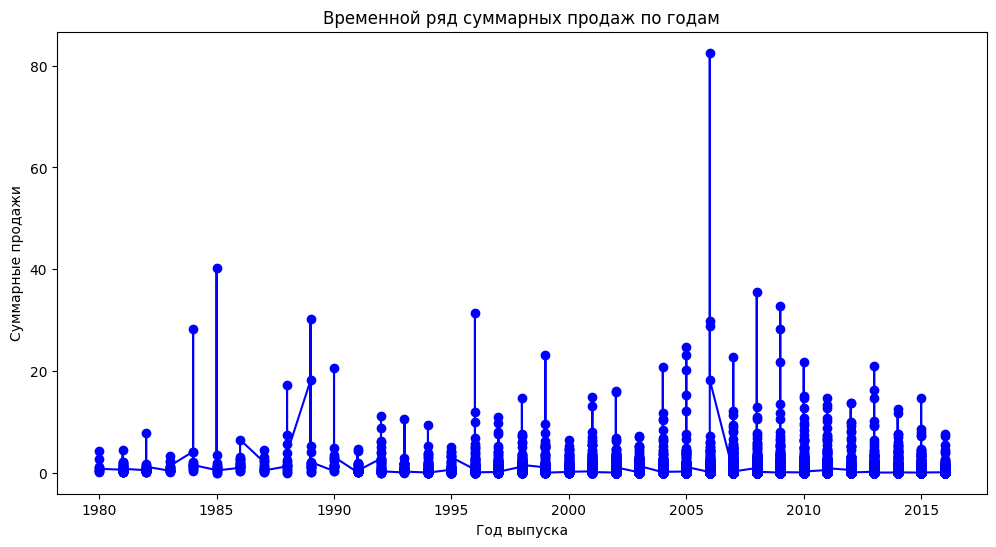

In [63]:
# Построение графика временного ряда суммарных продаж
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sum_sales'], marker='o', linestyle='-', color='b')

# Настройка графика
plt.title('Временной ряд суммарных продаж по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')

# Отображение графика
plt.show()

In [64]:
# Определение категориальных признаков
categorical_columns = df.select_dtypes(include='object').columns
# Удаление 'name' из списка категориальных признаков
categorical_columns = categorical_columns.drop('name')

In [65]:
# Кодируем категориальные признаки через get_dummies
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [66]:
data_encoded.head()

,name,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales,platform_3DO,platform_3DS,...,genre_Sports,genre_Strategy,rating_E,rating_E10+,rating_EC,rating_K-A,rating_M,rating_RP,rating_T,rating_Unknown
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,Kaboom!,1.07,0.07,0.0,0.01,-1,-1.0,1.15,0,0,...,0,0,0,0,0,0,0,0,0,1
1980,Missile Command,2.56,0.17,0.0,0.03,-1,-1.0,2.76,0,0,...,0,0,0,0,0,0,0,0,0,1
1980,Defender,0.99,0.05,0.0,0.01,-1,-1.0,1.05,0,0,...,0,0,0,0,0,0,0,0,0,1
1980,Bridge,0.25,0.02,0.0,0.00,-1,-1.0,0.27,0,0,...,0,0,0,0,0,0,0,0,0,1
1980,Freeway,0.32,0.02,0.0,0.00,-1,-1.0,0.34,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# Выделим признаки (features) и целевую переменную (target)
X = data_encoded.drop('name', axis=1)
y = data_encoded['sum_sales']

In [68]:
# Разделим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Нет активации для регрессии
])

In [81]:
# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
# Обучение модели
model.fit(X_train_scaled, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
83/83 [==============================] - 1s 4ms/step - loss: 0.7040 - val_loss: 0.0470
Epoch 2/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.0269
Epoch 3/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0163
Epoch 4/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0160
Epoch 5/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0173
Epoch 6/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.0126
Epoch 7/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 8/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0121
Epoch 9/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0108
Epoch 10/30
83/83 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0125
Epoch 11/30
83/83 [

In [83]:
# Оценка модели на тестовом наборе
loss = model.evaluate(X_test_scaled, y_test)
print(f'Loss on test set: {loss}')

103/103 [==============================] - 0s 1ms/step - loss: 0.0057
Loss on test set: 0.005704163108021021


In [75]:
# Получение пользовательского ввода
user_input_critic_score = float(input("Введите оценку критиков (от 0 до 100): "))
user_input_user_score = float(input("Введите оценку пользователей (от 0 до 10): "))
user_input_year_of_release = int(input("Введите год релиза: "))

In [76]:
# Стандартизация входных данных с использованием ранее созданного scaler
user_input_scaled = scaler.transform([[user_input_year_of_release, user_input_critic_score, user_input_user_score]])

/home/redalexdad/.local/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but StandardScaler is expecting 56 features as input.

In [ ]:
# Предсказание с использованием обученной модели
prediction = model.predict(user_input_scaled)

# Вывод результата предсказания
print(f"Предсказанная сумма продаж: {prediction[0][0]:.2f} млн копий")